In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import astropy.io.fits as pyfits
import astropy.utils as autils
import requests
import json
import datetime
from pprint import pprint as pp

# Jielai added modules f
import subprocess
import seaborn as sns
pw = 'XXX'
usrname = 'XXX'

# Time Counter function
import time
def tic():
    tic.start = time.perf_counter()
def toc():
    elapsed_seconds = time.perf_counter() - tic.start
    return elapsed_seconds # fractional

# NOAO server Settings
natroot = 'https://astroarchive.noirlab.edu'
assert natroot == 'https://astroarchive.noirlab.edu', 'Notebook does NOT point to PRODUCTION'
print(f"Using server on {natroot}")
adsurl = f'{natroot}/api/adv_search'
print(f"adsurl = {adsurl}")

# Start the timer
print(f'Started on: {str(datetime.datetime.now())}')
tic() # Start timing the run of this notebook

Using server on https://astroarchive.noirlab.edu
adsurl = https://astroarchive.noirlab.edu/api/adv_search
Started on: 2022-01-08 13:09:30.002161


In [3]:
jj = {
    "outfields" : [
        "md5sum",
        "archive_filename",
        #"telescope",
        #"instrument",
        #"obs_type",
        "proc_type",
        "prod_type",
        #"release_date",
        "proposal",
        "ra_center",
        #"ra_min",
        "dec_center",
        #"dec_min",
        # 'The local calendar date of the telescope, at the start of PM observing.' = caldat
        "caldat",
        "url",
        "filesize",
        "ifilter",
        #"seeing",
        "exposure",
        #"depth",
        "dateobs_min",
        "dateobs_max",
    ],
    "search" : [
        #["release_date", "2020-01-01", "2021-01-01"], # proprietary
        ["obs_type", 'object'],
        ["proposal","2020B-0253"],
        ["proc_type","instcal"],
        ["prod_type", "image"],
        ["caldat","2020-06-01", "2021-06-11"]
    ]
}
apiurl = f'{adsurl}/fasearch/?limit=200000'
print(f'Using API url: {apiurl}')
ads_df = pd.DataFrame(requests.post(apiurl,json=jj).json()[1:])
print(len(ads_df))
#ads_df

Using API url: https://astroarchive.noirlab.edu/api/adv_search/fasearch/?limit=200000
1651


Text(0.5, 1.0, 'all fields observed during DWF run 2021 June')

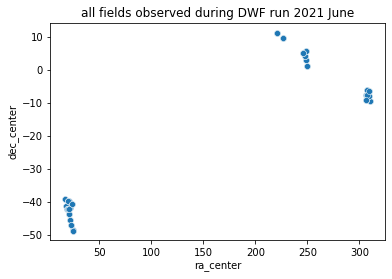

In [4]:
sns.scatterplot(data=ads_df, x="ra_center", y="dec_center")
plt.title("all fields observed during DWF run 2021 June")

[21.17795, -39.9611111, 0.03] GRB210605Agreen1
[18.9162908, -42.1027781, 0.03] GRB210605Agreen2
[23.2478742, -40.675, 0.03] GRB210605Agreen3
[19.3151779, -39.9611111, 0.03] GRB210605Agreen4
[20.8406671, -42.1027781, 0.03] GRB210605Agreen5
[17.76721, -41.388889, 0.03] GRB210605Apink1
[21.8494173, -42.0508599, 0.03] GRB210605Apink2
[17.3120418, -39.2597284, 0.03] GRB210605Apink3
[22.6885, -38.533333, 0.03] GRB210605Apink4
[19.950664, -38.533333, 0.03] GRB210605Apink5
[24.2083333, -48.75, 1.0] GRB210605A5
[23.0416667, -47.0944444, 0.05] GRB210605A4
[21.9583333, -45.4583333, 0.6] GRB210605A3
[20.9375, -43.8, 0.05] GRB210605A2
[19.9791667, -42.175, 0.2] GRB210605A1


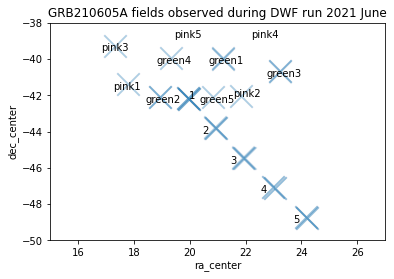

In [21]:
sns.scatterplot(data=ads_df, x="ra_center", y="dec_center", alpha=0.1, marker='x',s=500)
plt.title("GRB210605A fields observed during DWF run 2021 June")
plt.ylim(-50, -38)
plt.xlim(15, 27)
# there are 15 fields focusing on GRB210605A, which is correct 
# we defined 15 fields, but 2 were not observed even once
dic_fieldname_coordinates = {
    'GRB210605Agreen1' : [21.1779500,-39.9611111,0.03],
    'GRB210605Agreen2' : [18.9162908,-42.1027781,0.03],
    'GRB210605Agreen3' : [23.2478742,-40.6750000,0.03],
    'GRB210605Agreen4' : [19.3151779,-39.9611111,0.03],
    'GRB210605Agreen5' : [20.8406671,-42.1027781,0.03],
    'GRB210605Apink1' : [17.7672100,-41.3888890,0.03],
    'GRB210605Apink2' : [21.8494173,-42.0508599,0.03],
    'GRB210605Apink3' : [17.3120418,-39.2597284,0.03],
    'GRB210605Apink4' : [22.6885000,-38.5333330,0.03],
    'GRB210605Apink5' : [19.9506640,-38.5333330,0.03],
    'GRB210605A5' : [24.2083333, -48.7500000,1.0],
    'GRB210605A4' : [23.0416667, -47.0944444,0.05],
    'GRB210605A3' : [21.9583333, -45.4583333,0.6],
    'GRB210605A2' : [20.9375000, -43.8000000,0.05],
    'GRB210605A1' : [19.9791667, -42.1750000,0.2]
}

for n,c in dic_fieldname_coordinates.items():
    print(c,n)
    if n =='GRB210605A1':
        plt.annotate(n[10:], (c[0], c[1]))
    elif n == 'GRB210605Apink2':
        plt.annotate(n[10:], (c[0]-0.3, c[1]))
    else:
        plt.annotate(n[10:], (c[0]-0.5, c[1]-0.3))

# GRB210605A5

1.0 0.05528566706461281 0.05528566706461281
12


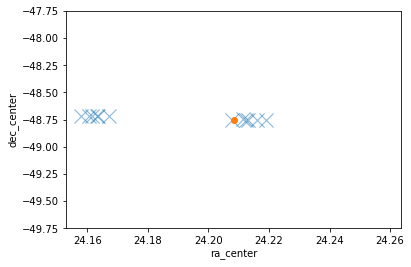

In [22]:
# GRB210605A5 : 24.2083333 -48.7500000 
field_name = 'GRB210605A5'
field_RA   =  dic_fieldname_coordinates[field_name][0]
field_DEC  = dic_fieldname_coordinates[field_name][1]
dec_offset_allowance = dic_fieldname_coordinates[field_name][2] # 1.0 
RA_offset_allowance  = np.abs(dec_offset_allowance*np.cos(field_DEC))
print(dec_offset_allowance,RA_offset_allowance,np.cos(field_DEC))
ra_min = field_RA-RA_offset_allowance
ra_max = field_RA+RA_offset_allowance
dec_min = field_DEC-dec_offset_allowance
dec_max = field_DEC+dec_offset_allowance
field_ads_df = ads_df[( (ads_df['ra_center']>ra_min) & (ads_df['ra_center']<ra_max) &
                        (ads_df['dec_center']<dec_max) & (ads_df['dec_center']>dec_min)
                     )]
print(len(field_ads_df))

sns.scatterplot(data=ads_df, x="ra_center", y="dec_center", alpha=0.5, marker='x',s=200)
plt.ylim(dec_min, dec_max)
plt.xlim(ra_min, ra_max)
plt.scatter(field_RA,field_DEC)
#field_ads_df

# GRB210605A4

0.05 0.049978325770895726 -0.9995665154179144
12


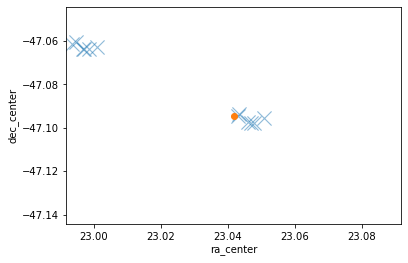

In [23]:
# GRB210605A4 : 23.0416667 -47.0944444
field_name = 'GRB210605A4'
field_RA   =  dic_fieldname_coordinates[field_name][0]
field_DEC  = dic_fieldname_coordinates[field_name][1]
dec_offset_allowance = dic_fieldname_coordinates[field_name][2] # 0.05
RA_offset_allowance  = np.abs(dec_offset_allowance*np.cos(field_DEC))
print(dec_offset_allowance,RA_offset_allowance,np.cos(field_DEC))
ra_min = field_RA-RA_offset_allowance
ra_max = field_RA+RA_offset_allowance
dec_min = field_DEC-dec_offset_allowance
dec_max = field_DEC+dec_offset_allowance
field_ads_df = ads_df[( (ads_df['ra_center']>ra_min) & (ads_df['ra_center']<ra_max) &
                        (ads_df['dec_center']<dec_max) & (ads_df['dec_center']>dec_min)
                     )]
print(len(field_ads_df))

sns.scatterplot(data=ads_df, x="ra_center", y="dec_center", alpha=0.5, marker='x',s=200)
plt.ylim(dec_min, dec_max)
plt.xlim(ra_min, ra_max)
plt.scatter(field_RA,field_DEC)
#field_ads_df

# GRB210605A3

0.6 0.056771054609029946 0.09461842434838325
12


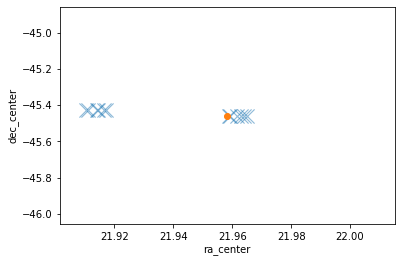

In [25]:
# GRB210605A3 : 21.9583333 -45.4583333
field_name = 'GRB210605A3'
field_RA   =  dic_fieldname_coordinates[field_name][0]
field_DEC  = dic_fieldname_coordinates[field_name][1]
dec_offset_allowance = dic_fieldname_coordinates[field_name][2] # 0.6
RA_offset_allowance  = np.abs(dec_offset_allowance*np.cos(field_DEC))
print(dec_offset_allowance,RA_offset_allowance,np.cos(field_DEC))
ra_min = field_RA-RA_offset_allowance
ra_max = field_RA+RA_offset_allowance
dec_min = field_DEC-dec_offset_allowance
dec_max = field_DEC+dec_offset_allowance
field_ads_df = ads_df[( (ads_df['ra_center']>ra_min) & (ads_df['ra_center']<ra_max) &
                        (ads_df['dec_center']<dec_max) & (ads_df['dec_center']>dec_min)
                     )]
print(len(field_ads_df))

sns.scatterplot(data=ads_df, x="ra_center", y="dec_center", alpha=0.5, marker='x',s=200)
plt.ylim(dec_min, dec_max)
plt.xlim(ra_min, ra_max)
plt.scatter(field_RA,field_DEC)
#field_ads_df

# GRB210605A2

0.05 0.04917149197491417 0.9834298394982833
12


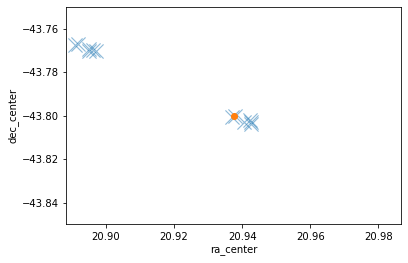

In [26]:
# GRB210605A2 : 20.9375000 -43.8000000
field_name = 'GRB210605A2'
field_RA   =  dic_fieldname_coordinates[field_name][0]
field_DEC  = dic_fieldname_coordinates[field_name][1]
dec_offset_allowance = dic_fieldname_coordinates[field_name][2] # 0.05
RA_offset_allowance  = np.abs(dec_offset_allowance*np.cos(field_DEC))
print(dec_offset_allowance,RA_offset_allowance,np.cos(field_DEC))
ra_min = field_RA-RA_offset_allowance
ra_max = field_RA+RA_offset_allowance
dec_min = field_DEC-dec_offset_allowance
dec_max = field_DEC+dec_offset_allowance
field_ads_df = ads_df[( (ads_df['ra_center']>ra_min) & (ads_df['ra_center']<ra_max) &
                        (ads_df['dec_center']<dec_max) & (ads_df['dec_center']>dec_min)
                     )]
print(len(field_ads_df))

sns.scatterplot(data=ads_df, x="ra_center", y="dec_center", alpha=0.5, marker='x',s=200)
plt.ylim(dec_min, dec_max)
plt.xlim(ra_min, ra_max)
plt.scatter(field_RA,field_DEC)
#field_ads_df

# GRB210605A1

0.2 0.04686045901385817 -0.23430229506929084
18


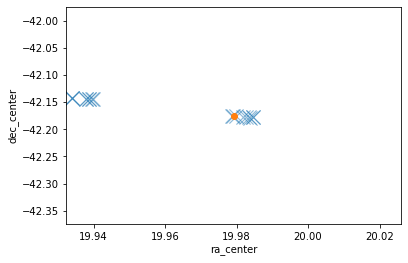

In [27]:
# GRB210605A1 : 19.9791667 -42.1750000
field_name = 'GRB210605A1'
field_RA   =  dic_fieldname_coordinates[field_name][0]
field_DEC  = dic_fieldname_coordinates[field_name][1]
dec_offset_allowance = dic_fieldname_coordinates[field_name][2] # 0.2
RA_offset_allowance  = np.abs(dec_offset_allowance*np.cos(field_DEC))
print(dec_offset_allowance,RA_offset_allowance,np.cos(field_DEC))
ra_min = field_RA-RA_offset_allowance
ra_max = field_RA+RA_offset_allowance
dec_min = field_DEC-dec_offset_allowance
dec_max = field_DEC+dec_offset_allowance
field_ads_df = ads_df[( (ads_df['ra_center']>ra_min) & (ads_df['ra_center']<ra_max) &
                        (ads_df['dec_center']<dec_max) & (ads_df['dec_center']>dec_min)
                     )]
print(len(field_ads_df))

sns.scatterplot(data=ads_df, x="ra_center", y="dec_center", alpha=0.5, marker='x',s=200)
plt.ylim(dec_min, dec_max)
plt.xlim(ra_min, ra_max)
plt.scatter(field_RA,field_DEC)

#field_ads_df # has z band too

# GRB210605Agreen1

0.03 0.019123934295534734 -0.6374644765178245
8


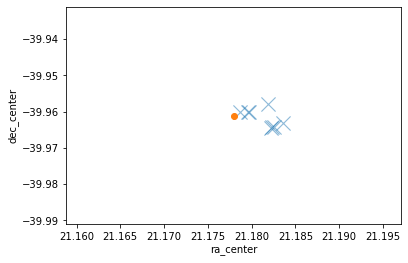

In [28]:
# green1 : 21.1779500,-39.9611111
field_name = 'GRB210605Agreen1'
field_RA   =  dic_fieldname_coordinates[field_name][0]
field_DEC  = dic_fieldname_coordinates[field_name][1]
dec_offset_allowance = dic_fieldname_coordinates[field_name][2] # 0.03
RA_offset_allowance  = np.abs(dec_offset_allowance*np.cos(field_DEC))
print(dec_offset_allowance,RA_offset_allowance,np.cos(field_DEC))
ra_min = field_RA-RA_offset_allowance
ra_max = field_RA+RA_offset_allowance
dec_min = field_DEC-dec_offset_allowance
dec_max = field_DEC+dec_offset_allowance
field_ads_df = ads_df[( (ads_df['ra_center']>ra_min) & (ads_df['ra_center']<ra_max) &
                        (ads_df['dec_center']<dec_max) & (ads_df['dec_center']>dec_min)
                     )]
print(len(field_ads_df))

sns.scatterplot(data=ads_df, x="ra_center", y="dec_center", alpha=0.5, marker='x',s=200)
plt.ylim(dec_min, dec_max)
plt.xlim(ra_min, ra_max)
plt.scatter(field_RA,field_DEC)

# field_ads_df # only observe 4th and 6th (confirmed with obsrving log spreadsheet)

# GRB210605Agreen2

0.03 0.009115259838225953 -0.30384199460753175
8


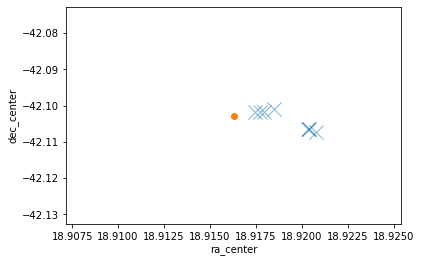

In [29]:
# green2 : 18.9162908,-42.1027781
field_name = 'GRB210605Agreen2'
field_RA   =  dic_fieldname_coordinates[field_name][0]
field_DEC  = dic_fieldname_coordinates[field_name][1]
dec_offset_allowance = dic_fieldname_coordinates[field_name][2] # 0.03
RA_offset_allowance  = np.abs(dec_offset_allowance*np.cos(field_DEC))
print(dec_offset_allowance,RA_offset_allowance,np.cos(field_DEC))
ra_min = field_RA-RA_offset_allowance
ra_max = field_RA+RA_offset_allowance
dec_min = field_DEC-dec_offset_allowance
dec_max = field_DEC+dec_offset_allowance
field_ads_df = ads_df[( (ads_df['ra_center']>ra_min) & (ads_df['ra_center']<ra_max) &
                        (ads_df['dec_center']<dec_max) & (ads_df['dec_center']>dec_min)
                     )]
print(len(field_ads_df))

sns.scatterplot(data=ads_df, x="ra_center", y="dec_center", alpha=0.5, marker='x',s=200)
plt.ylim(dec_min, dec_max)
plt.xlim(ra_min, ra_max)
plt.scatter(field_RA,field_DEC)

# field_ads_df # only observe 4th and 6th (confirmed with obsrving log spreadsheet)

# GRB210605Agreen3

0.03 0.029589071860462855 -0.9863023953487619
8


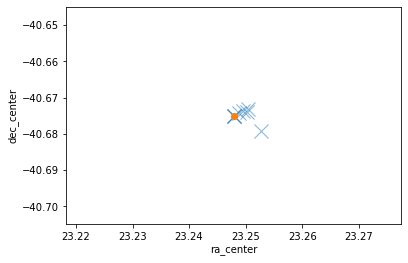

In [30]:
# green3 : 23.2478742,-40.6750000
field_name = 'GRB210605Agreen3'
field_RA   =  dic_fieldname_coordinates[field_name][0]
field_DEC  = dic_fieldname_coordinates[field_name][1]
dec_offset_allowance = dic_fieldname_coordinates[field_name][2] # 0.03
RA_offset_allowance  = np.abs(dec_offset_allowance*np.cos(field_DEC))
print(dec_offset_allowance,RA_offset_allowance,np.cos(field_DEC))
ra_min = field_RA-RA_offset_allowance
ra_max = field_RA+RA_offset_allowance
dec_min = field_DEC-dec_offset_allowance
dec_max = field_DEC+dec_offset_allowance
field_ads_df = ads_df[( (ads_df['ra_center']>ra_min) & (ads_df['ra_center']<ra_max) &
                        (ads_df['dec_center']<dec_max) & (ads_df['dec_center']>dec_min)
                     )]
print(len(field_ads_df))

sns.scatterplot(data=ads_df, x="ra_center", y="dec_center", alpha=0.5, marker='x',s=200)
plt.ylim(dec_min, dec_max)
plt.xlim(ra_min, ra_max)
plt.scatter(field_RA,field_DEC)

# field_ads_df # only observe 4th and 6th (confirmed with obsrving log spreadsheet)

# GRB210605Agreen4

0.03 0.019123934295534734 -0.6374644765178245
4


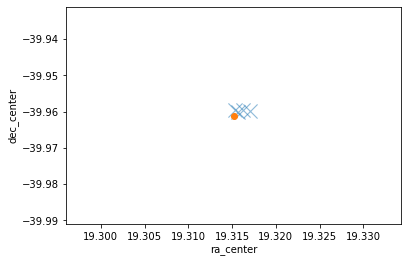

In [31]:
# green4 :19.3151779,-39.9611111
field_name = 'GRB210605Agreen4'
field_RA   =  dic_fieldname_coordinates[field_name][0]
field_DEC  = dic_fieldname_coordinates[field_name][1]
dec_offset_allowance = dic_fieldname_coordinates[field_name][2] # 0.03
RA_offset_allowance  = np.abs(dec_offset_allowance*np.cos(field_DEC))
print(dec_offset_allowance,RA_offset_allowance,np.cos(field_DEC))
ra_min = field_RA-RA_offset_allowance
ra_max = field_RA+RA_offset_allowance
dec_min = field_DEC-dec_offset_allowance
dec_max = field_DEC+dec_offset_allowance
field_ads_df = ads_df[( (ads_df['ra_center']>ra_min) & (ads_df['ra_center']<ra_max) &
                        (ads_df['dec_center']<dec_max) & (ads_df['dec_center']>dec_min)
                     )]
print(len(field_ads_df))

sns.scatterplot(data=ads_df, x="ra_center", y="dec_center", alpha=0.5, marker='x',s=200)
plt.ylim(dec_min, dec_max)
plt.xlim(ra_min, ra_max)
plt.scatter(field_RA,field_DEC)

# field_ads_df # only observe 4th (confirmed with obsrving log spreadsheet) 

# GRB210605Agreen5

0.03 0.009115259838225953 -0.30384199460753175
4


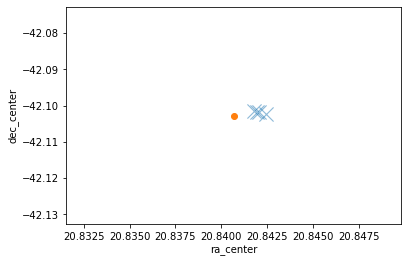

In [32]:
# green5 : 20.8406671,-42.1027781
field_name = 'GRB210605Agreen5'
field_RA   =  dic_fieldname_coordinates[field_name][0]
field_DEC  = dic_fieldname_coordinates[field_name][1]
dec_offset_allowance = dic_fieldname_coordinates[field_name][2] #  0.03
RA_offset_allowance  = np.abs(dec_offset_allowance*np.cos(field_DEC))
print(dec_offset_allowance,RA_offset_allowance,np.cos(field_DEC))
ra_min = field_RA-RA_offset_allowance
ra_max = field_RA+RA_offset_allowance
dec_min = field_DEC-dec_offset_allowance
dec_max = field_DEC+dec_offset_allowance
field_ads_df = ads_df[( (ads_df['ra_center']>ra_min) & (ads_df['ra_center']<ra_max) &
                        (ads_df['dec_center']<dec_max) & (ads_df['dec_center']>dec_min)
                     )]
print(len(field_ads_df))

sns.scatterplot(data=ads_df, x="ra_center", y="dec_center", alpha=0.5, marker='x',s=200)
plt.ylim(dec_min, dec_max)
plt.xlim(ra_min, ra_max)
plt.scatter(field_RA,field_DEC)

# field_ads_df # only observe 4th (confirmed with obsrving log spreadsheet)

# GRB210605Apink1

0.03 0.025604161604650923 -0.8534720534883642
4


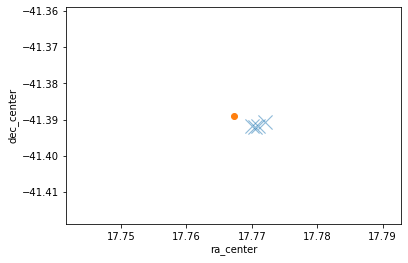

In [33]:
# pink1 : 17.7672100,-41.3888890
field_name = 'GRB210605Apink1'
field_RA   =  dic_fieldname_coordinates[field_name][0]
field_DEC  = dic_fieldname_coordinates[field_name][1]
dec_offset_allowance = dic_fieldname_coordinates[field_name][2] # 0.03
RA_offset_allowance  = np.abs(dec_offset_allowance*np.cos(field_DEC))
print(dec_offset_allowance,RA_offset_allowance,np.cos(field_DEC))
ra_min = field_RA-RA_offset_allowance
ra_max = field_RA+RA_offset_allowance
dec_min = field_DEC-dec_offset_allowance
dec_max = field_DEC+dec_offset_allowance
field_ads_df = ads_df[( (ads_df['ra_center']>ra_min) & (ads_df['ra_center']<ra_max) &
                        (ads_df['dec_center']<dec_max) & (ads_df['dec_center']>dec_min)
                     )]
print(len(field_ads_df))

sns.scatterplot(data=ads_df, x="ra_center", y="dec_center", alpha=0.5, marker='x',s=200)
plt.ylim(dec_min, dec_max)
plt.xlim(ra_min, ra_max)
plt.scatter(field_RA,field_DEC)

# field_ads_df # only observe 5th (confirmed with obsrving log spreadsheet)

# GRB210605Apink2

0.03 0.010586219973372455 -0.3528739991124152
4


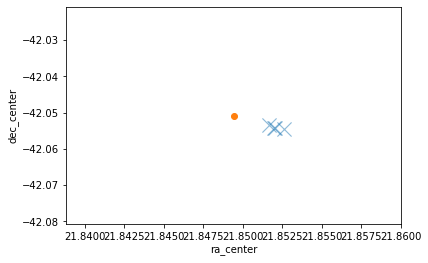

In [34]:
# pink2: 21.8494173,-42.0508599
field_name = 'GRB210605Apink2'
field_RA   =  dic_fieldname_coordinates[field_name][0]
field_DEC  = dic_fieldname_coordinates[field_name][1]
dec_offset_allowance = dic_fieldname_coordinates[field_name][2] # 0.03
RA_offset_allowance  = np.abs(dec_offset_allowance*np.cos(field_DEC))
print(dec_offset_allowance,RA_offset_allowance,np.cos(field_DEC))
ra_min = field_RA-RA_offset_allowance
ra_max = field_RA+RA_offset_allowance
dec_min = field_DEC-dec_offset_allowance
dec_max = field_DEC+dec_offset_allowance
field_ads_df = ads_df[( (ads_df['ra_center']>ra_min) & (ads_df['ra_center']<ra_max) &
                        (ads_df['dec_center']<dec_max) & (ads_df['dec_center']>dec_min)
                     )]
print(len(field_ads_df))

sns.scatterplot(data=ads_df, x="ra_center", y="dec_center", alpha=0.5, marker='x',s=200)
plt.ylim(dec_min, dec_max)
plt.xlim(ra_min, ra_max)
plt.scatter(field_RA,field_DEC)

# field_ads_df # only observe 5th (confirmed with obsrving log spreadsheet)

# GRB210605Apink3

0.03 0.025604161604650923 -0.8534720534883642
4


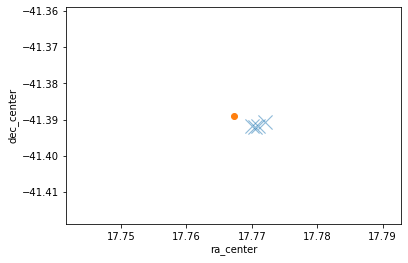

In [35]:
# pink3: 17.3120418,-39.2597284
field_name = 'GRB210605Apink1'
field_RA   =  dic_fieldname_coordinates[field_name][0]
field_DEC  = dic_fieldname_coordinates[field_name][1]
dec_offset_allowance = dic_fieldname_coordinates[field_name][2] # 0.03
RA_offset_allowance  = np.abs(dec_offset_allowance*np.cos(field_DEC))
print(dec_offset_allowance,RA_offset_allowance,np.cos(field_DEC))
ra_min = field_RA-RA_offset_allowance
ra_max = field_RA+RA_offset_allowance
dec_min = field_DEC-dec_offset_allowance
dec_max = field_DEC+dec_offset_allowance
field_ads_df = ads_df[( (ads_df['ra_center']>ra_min) & (ads_df['ra_center']<ra_max) &
                        (ads_df['dec_center']<dec_max) & (ads_df['dec_center']>dec_min)
                     )]
print(len(field_ads_df))

sns.scatterplot(data=ads_df, x="ra_center", y="dec_center", alpha=0.5, marker='x',s=200)
plt.ylim(dec_min, dec_max)
plt.xlim(ra_min, ra_max)
plt.scatter(field_RA,field_DEC)

# field_ads_df # only observe 5th (confirmed with obsrving log spreadsheet)

In [19]:
elapsed = toc()
print(f'Elapsed seconds={elapsed} on {natroot}')
print(f'Completed on: {str(datetime.datetime.now())}')

Elapsed seconds=39.04439736800123 on https://astroarchive.noirlab.edu
Completed on: 2022-01-08 13:10:09.048005
